In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Model_sub(keras.Model):
    def __init__(self,hidden,drop_rate,outputs):
        super(Model_sub,self).__init__()
        self.hidden1 = keras.layers.Dense(hidden,'relu')
        self.dropout = keras.layers.Dropout(drop_rate)
        self.outputs = keras.layers.Dense(outputs,'softmax')
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.dropout(x)
        x = self.outputs(x)
        
        return x
    
model_sub = Model_sub(64,0.2,10)

In [3]:
samples = np.array(['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아'])

targets =np.array([[1], [0], [1], [1], [0], [1]])

print(samples)
print(targets)

['너 오늘 이뻐 보인다' '나는 오늘 기분이 더러워' '끝내주는데, 좋은 일이 있나봐' '나 좋은 일이 생겼어'
 '아 오늘 진짜 짜증나' '환상적인데, 정말 좋은거 같아']
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [4]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)


In [5]:
batch_size = 2
epochs = 100
vocab_size = len(tokenizer.word_index) + 1
emb_size = 128
hidden = 64
outputs =1

class Sentimental_analysis(keras.Model):
    def __init__(self,vocab_size, emb_size, hidden, outputs):
        super(Sentimental_analysis, self).__init__()
        self.emb = keras.layers.Embedding(vocab_size, emb_size)
        self.dense = keras.layers.Dense(hidden, 'relu')
        self.outputs = keras.layers.Dense(outputs,'sigmoid')
        
    def call(self,inputs):
        x = self.emb(inputs)
        x = tf.reduce_mean(x, axis=1)
        x = self.dense(x)
        x = self.outputs(x)
        
        return x
    
sentimental_analysis = Sentimental_analysis(vocab_size, emb_size, hidden, outputs)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [7]:
## tokenizer

from nltk.tokenize import word_tokenize, sent_tokenize

In [8]:
## count-based vectorizer

A = np.array([[0,0,0,1,0,1,1,0,0],
              [0,0,0,1,1,0,1,0,0],
              [0,1,1,0,2,0,0,0,0],
              [1,0,0,0,0,0,0,1,1]])

A.shape

(4, 9)

In [10]:
U, s, VT = np.linalg.svd(A, full_matrices=True)

print('U:')
print(U.round(3))

U:
[[-0.24   0.751  0.    -0.615]
 [-0.506  0.444 -0.     0.739]
 [-0.828 -0.489 -0.    -0.274]
 [-0.    -0.     1.     0.   ]]


In [13]:
print('s:')
print(s)
print('VT:')
print(VT.round(3))

s:
[2.68731789 2.04508425 1.73205081 0.77197992]
VT:
[[-0.    -0.308 -0.308 -0.278 -0.805 -0.089 -0.278 -0.    -0.   ]
 [ 0.    -0.239 -0.239  0.584 -0.261  0.367  0.584 -0.    -0.   ]
 [ 0.577 -0.     0.     0.    -0.     0.    -0.     0.577  0.577]
 [ 0.    -0.354 -0.354  0.161  0.249 -0.797  0.161 -0.    -0.   ]
 [-0.    -0.779 -0.013 -0.198  0.396  0.396 -0.198  0.     0.   ]
 [-0.289  0.312 -0.781 -0.242  0.234  0.234  0.008  0.144  0.144]
 [-0.289 -0.104  0.26  -0.586 -0.078 -0.078  0.664  0.144  0.144]
 [-0.5   -0.06   0.15   0.239 -0.045 -0.045 -0.194  0.75  -0.25 ]
 [-0.5   -0.06   0.15   0.239 -0.045 -0.045 -0.194 -0.25   0.75 ]]


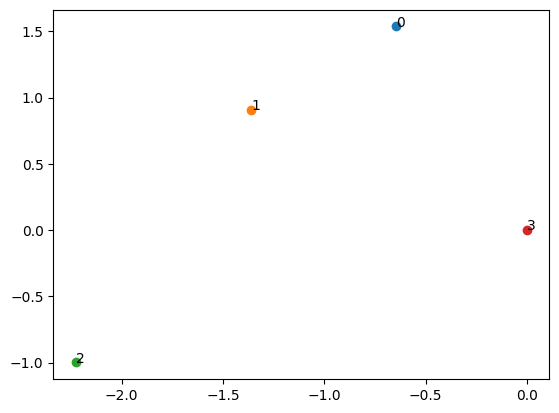

In [18]:
svd_matrix = np.hstack([U[:, 0:1] * s[0], U[:,1:2] * s[1]])

for i in range(4):
    plt.plot(svd_matrix[i,0],svd_matrix[i,1], marker = 'o')
    plt.text(svd_matrix[i,0],svd_matrix[i,1],i)
    
plt.show()

In [19]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")

In [20]:
countvectorizer = CountVectorizer()
countvectorizer.fit(sent)
print(countvectorizer.vocabulary_)

{'휴일': 16, '오늘': 7, '서쪽': 5, '중심': 12, '으로': 8, '폭염': 13, '이어졌는데요': 9, '내일': 1, '반가운': 4, '소식': 6, '있습니다': 11, '피해서': 14, '놀러왔다가': 2, '갑작스런': 0, '인해': 10, '망연자실': 3, '하고': 15}


In [21]:
count_vec = countvectorizer.transform(sent)
count_vec.toarray()

array([[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]], dtype=int64)

In [24]:
arr = count_vec.toarray()

print(arr)

[[0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1]
 [1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1]]


In [32]:
andarr = arr[0] & arr[1]

In [35]:
count = andarr.sum()

In [36]:
print(count/len(arr[0]))

0.17647058823529413


In [42]:
## cosine similarity

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

In [43]:
cos_dis_count = cosine_similarity(arr[0:1],arr[1:2])

print('cosine_similarity, count_vect', cos_dis_count)

cosine_similarity, count_vect [[0.30151134]]


In [39]:
cos_dis_count = euclidean_distances(arr[0:1],arr[1:2])

print('euclidean_distances, count_vect', cos_dis_count)

euclidean_distances, count_vect [[3.74165739]]


In [40]:
cos_dis_count = manhattan_distances(arr[0:1],arr[1:2])

print('manhattan_distances, count_vect', cos_dis_count)

manhattan_distances, count_vect [[14.]]


In [45]:
data_set = tf.keras.utils.get_file(
    fname = 'imdb.tar.gz',
    origin= 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
    extract= True
)

84125825/84125825 [==============================] - 38s 0us/step


In [54]:
import os
import glob

In [49]:
os.path.dirname('./aclImdb/')
os.path.join(os.path.dirname('./aclImdb/'),'train','pos')

'./aclImdb\\train\\pos'

In [56]:
folder_path = os.path.dirname('./aclImdb/')
tt_list = ['train','test']
pn_list = ['pos','neg']

# file_paths = []
data = {}
for i in tt_list:
    for j in pn_list:
        file_paths = glob.glob(os.path.join(folder_path, i, j,"*.*"))
        data[i+"_"+j] = []
        
        for k in file_paths:
            with open(k,'rt',encoding='utf-8') as f:
                data[i+"_"+j].append(f.read())
        # file_paths.append(file_path)
        
# display(file_paths)

In [59]:
data.keys()
data['train_pos'][0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [60]:
import pandas as pd

In [66]:
data_train_pos = pd.DataFrame(data['train_pos'], columns= ['review'])
data_train_pos['sentiment'] = 1
data_train_pos.head()

data_train_neg = pd.DataFrame(data['train_neg'], columns= ['review'])
data_train_neg['sentiment'] = 0
data_train_neg.head()

train_df = pd.concat([data_train_pos, data_train_neg], ignore_index=True)
train_df.shape
train_df.head()
train_df.tail()

,review,sentiment
24995,"Towards the end of the movie, I felt it was to...",0
24996,This is the kind of movie that my enemies cont...,0
24997,I saw 'Descent' last night at the Stockholm Fi...,0
24998,Some films that you pick up for a pound turn o...,0
24999,"This is one of the dumbest films, I've ever se...",0


In [69]:
review = train_df['review']

review[0]
review[1]

'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they\'ll be next to end up on the streets.<br /><br />But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the entertainment sets, a bathroom, pictures on the wall, a computer, and everything you once treasure to see what it\'s like to be homeless? That is Goddard Bolt\'s lesson.<br /><br />Mel Brooks (who directs) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival (Jeffery Tambor) to see if he can live in the streets for thirty days withou

In [72]:
tokenized_review = [len(x.split()) for x in review]
print('단어갯수: ',tokenized_review)
eumjeol_review = [len(x.replace(" ", "")) for x in review]
print('음절갯수: ',eumjeol_review)

[140, 428, 147, 124, 120, 171, 108, 340, 436, 324, 280, 86, 282, 224, 145, 158, 195, 279, 129, 152, 214, 556, 168, 179, 141, 104, 109, 310, 150, 142, 244, 119, 159, 165, 437, 453, 54, 298, 221, 331, 356, 160, 527, 242, 112, 331, 966, 544, 87, 1839, 436, 541, 182, 539, 202, 715, 180, 162, 54, 278, 93, 181, 133, 216, 316, 165, 103, 223, 106, 96, 124, 194, 291, 322, 44, 148, 107, 326, 71, 224, 115, 262, 111, 117, 55, 56, 268, 129, 169, 159, 249, 76, 196, 119, 164, 55, 63, 101, 137, 166, 168, 216, 114, 160, 588, 159, 272, 242, 146, 507, 225, 337, 193, 54, 163, 116, 274, 395, 272, 354, 187, 104, 222, 197, 140, 221, 512, 159, 112, 110, 157, 142, 221, 145, 323, 171, 143, 211, 629, 237, 319, 199, 341, 135, 303, 103, 130, 160, 121, 649, 141, 172, 414, 299, 498, 329, 392, 153, 153, 185, 185, 133, 136, 295, 499, 90, 391, 333, 154, 149, 95, 148, 145, 173, 74, 110, 124, 133, 114, 390, 145, 123, 137, 147, 157, 220, 129, 133, 132, 147, 200, 135, 457, 273, 161, 421, 401, 161, 155, 150, 267, 183, 134, 

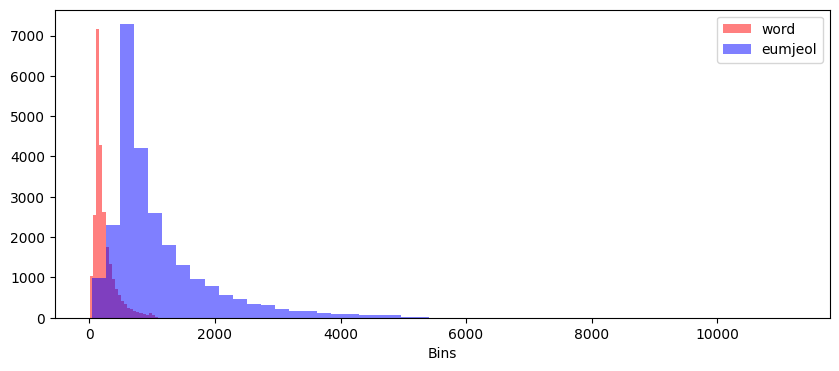

In [73]:
plt.figure(figsize=(10,4))

plt.hist(tokenized_review, bins = 50, color='r', alpha = 0.5, label = 'word')
plt.hist(eumjeol_review, bins = 50, color='b', alpha = 0.5, label = 'eumjeol')

plt.xlabel('Bins')
plt.legend()

plt.show()

In [82]:
## EDA
def summary_token_len(x):
    print('문장 최대 길이: {}'.format(np.max(x)))
    print('문장 최소 길이: {}'.format(np.min(x)))
    print('문장 평균 길이: {}'.format(np.mean(x)))
    print('문장 표준편차 길이: {}'.format(np.std(x)))
    print('문장 중앙값 길이: {}'.format(np.median(x)))
    print('문장 1사분위수 길이: {}'.format(np.quantile(x,0.25)))
    print('문장 3사분위수 길이: {}'.format(np.quantile(x,0.75)))
    
summary_token_len(tokenized_review)

문장 최대 길이: 2470
문장 최소 길이: 10
문장 평균 길이: 233.7872
문장 표준편차 길이: 173.72955740506566
문장 중앙값 길이: 174.0
문장 1사분위수 길이: 127.0
문장 3사분위수 길이: 284.0


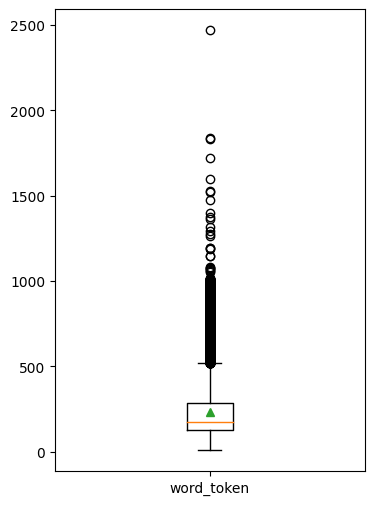

In [83]:
plt.figure(figsize=(4,6))
plt.boxplot(tokenized_review,
            labels = ['word_token'],
            showmeans=True)

plt.show()

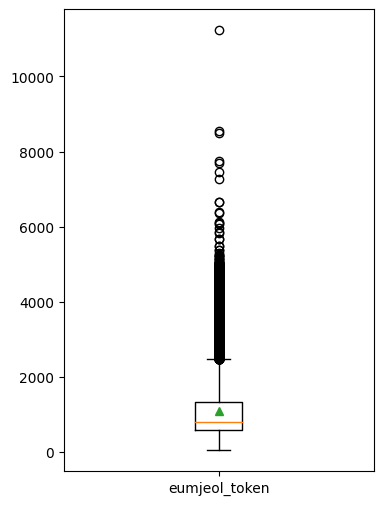

In [84]:
plt.figure(figsize=(4,6))
plt.boxplot(eumjeol_review,
            labels = ['eumjeol_token'],
            showmeans=True)

plt.show()

In [87]:
! pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 9.5 MB/s eta 0:00:00


In [88]:
from wordcloud import WordCloud, STOPWORDS

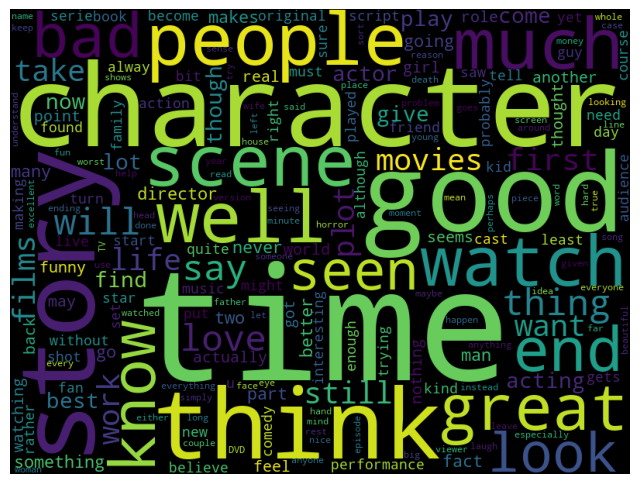

In [99]:
word_list = ['br','used','see','make','even','movie','film','way','show','seem','really','one','made','little','almost']
MY_STOPWORDS = list(STOPWORDS) + word_list
MY_STOPWORDS = set(MY_STOPWORDS)

x = ' '.join(review)

word_cloud = WordCloud(stopwords=MY_STOPWORDS,
                       width = 800, height = 600)
word_cloud.generate(x)

plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()